In [1]:
import pandas as pd
import nltk
import numpy as np
from cleantext import clean
import matplotlib as mlb
import seaborn as sns

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
training_tweets=pd.read_csv('C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/train.csv')
training_tweets.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
training_tweets['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [4]:
pd.set_option('display.max_colwidth',None)
training_tweets.head()

id keyword location  \
0   1     NaN      NaN   
1   4     NaN      NaN   
2   5     NaN      NaN   
3   6     NaN      NaN   
4   7     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  
0       1  
1       1  
2       1  
3       1  
4       1

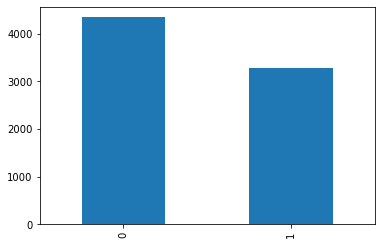

In [5]:
training_tweets['target'].value_counts().plot(kind='bar')

In [6]:
training_tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
training_tweets.drop(['keyword','location'],axis=1,inplace=True)
training_tweets.head()

id  \
0   1   
1   4   
2   5   
3   6   
4   7   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [8]:
training_tweets['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [9]:
clean.clean(training_tweets['text'][1],lower=True,no_urls=True,no_currency_symbols=True,no_digits=True,no_emails=True,no_numbers=True,no_phone_numbers=True,no_punct=True)


'forest fire near la ronge sask canada'

In [10]:
def clean_text(text):
    cleaned_text=clean.clean(text,lower=True,no_urls=True,no_currency_symbols=True,no_digits=True,no_emails=True,no_numbers=True,no_phone_numbers=True,no_punct=True)
    return cleaned_text


In [11]:
training_tweets['clean_text']=training_tweets['text'].apply(clean_text)
training_tweets.head()

id  \
0   1   
1   4   
2   5   
3   6   
4   7   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  \
0       1   
1       1   
2       1   
3       1   
4       1   

                                                                                                                           clean_text  
0                                                                our deeds are the reason of this earthquake may allah forgive us all  
1                                                                                               forest fire near la ronge sask canada  
2  all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected  
3                                                                   <number> people receive wildfires evacuation orders in california  
4                                               just got sent this photo from ruby alaska as smoke from wildfires pours into a school

In [12]:
training_tweets.drop(['text'],inplace=True,axis=1)
training_tweets.head()

id  target  \
0   1       1   
1   4       1   
2   5       1   
3   6       1   
4   7       1   

                                                                                                                           clean_text  
0                                                                our deeds are the reason of this earthquake may allah forgive us all  
1                                                                                               forest fire near la ronge sask canada  
2  all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected  
3                                                                   <number> people receive wildfires evacuation orders in california  
4                                               just got sent this photo from ruby alaska as smoke from wildfires pours into a school

In [13]:
training_tweets.drop(['id'],inplace=True,axis=1)
training_tweets.head()

target  \
0       1   
1       1   
2       1   
3       1   
4       1   

                                                                                                                           clean_text  
0                                                                our deeds are the reason of this earthquake may allah forgive us all  
1                                                                                               forest fire near la ronge sask canada  
2  all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected  
3                                                                   <number> people receive wildfires evacuation orders in california  
4                                               just got sent this photo from ruby alaska as smoke from wildfires pours into a school

In [14]:
training_tweets['clean_text']=training_tweets['clean_text'].astype(str)
training_tweets.head()

target  \
0       1   
1       1   
2       1   
3       1   
4       1   

                                                                                                                           clean_text  
0                                                                our deeds are the reason of this earthquake may allah forgive us all  
1                                                                                               forest fire near la ronge sask canada  
2  all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected  
3                                                                   <number> people receive wildfires evacuation orders in california  
4                                               just got sent this photo from ruby alaska as smoke from wildfires pours into a school

In [31]:
def tokenize_text(text):
    tokens=[word for word in nltk.word_tokenize(text)]
    return tokens

In [40]:
tokenize_text(training_tweets['clean_text'][1])

['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
vectorizer=TfidfVectorizer(tokenizer=tokenize_text,ngram_range=(1,3),lowercase=False,max_features=10000,max_df=0.75,stop_words='english')
train_vectors=vectorizer.fit_transform(training_tweets['clean_text'])

In [70]:
train_vectors.shape

(7613, 10000)

In [15]:
testing_tweets=pd.read_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/test.csv")
testing_tweets.head()

id keyword location  \
0   0     NaN      NaN   
1   2     NaN      NaN   
2   3     NaN      NaN   
3   9     NaN      NaN   
4  11     NaN      NaN   

                                                                                               text  
0                                                                Just happened a terrible car crash  
1                                  Heard about #earthquake is different cities, stay safe everyone.  
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all  
3                                                          Apocalypse lighting. #Spokane #wildfires  
4                                                     Typhoon Soudelor kills 28 in China and Taiwan

In [16]:
testing_tweets.drop(['id','keyword'],inplace=True,axis=1)
testing_tweets.head()

location  \
0      NaN   
1      NaN   
2      NaN   
3      NaN   
4      NaN   

                                                                                               text  
0                                                                Just happened a terrible car crash  
1                                  Heard about #earthquake is different cities, stay safe everyone.  
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all  
3                                                          Apocalypse lighting. #Spokane #wildfires  
4                                                     Typhoon Soudelor kills 28 in China and Taiwan

In [17]:
testing_tweets.drop(['location'],axis=1,inplace=True)


In [18]:
testing_tweets['clean_text']=testing_tweets['text'].apply(clean_text)
testing_tweets.head()

text  \
0                                                                Just happened a terrible car crash   
1                                  Heard about #earthquake is different cities, stay safe everyone.   
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
3                                                          Apocalypse lighting. #Spokane #wildfires   
4                                                     Typhoon Soudelor kills 28 in China and Taiwan   

                                                                                       clean_text  
0                                                              just happened a terrible car crash  
1                                   heard about earthquake is different cities stay safe everyone  
2  there is a forest fire at spot pond geese are fleeing across the street i cannot save them all  
3                                                           apocalypse lighting spokane wildfires  
4                                             typhoon soudelor kills <number> in china and taiwan

In [19]:
testing_tweets.drop(['text'],axis=1,inplace=True)


In [20]:
testing_tweets.count()

clean_text    3263
dtype: int64

In [77]:
test_vectors=vectorizer.transform(testing_tweets.clean_text)

In [78]:
train_vectors.shape

(7613, 10000)

In [54]:
import xgboost as xgb

In [86]:
xgb_clf=xgb.XGBClassifier(n_estimators=300,learning_rate=0.05,random_state=1,n_jobs=3)
xgb_clf.fit(train_vectors,training_tweets['target'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=3, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
predictions=xgb_clf.predict(test_vectors)

In [88]:
len(predictions)

3263

In [40]:
#read sample submission file
sample_submission=pd.read_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/sample_submission.csv")
sample_submission.count()       

id        3263
target    3263
dtype: int64

In [90]:
sample_submission['target']=predictions
sample_submission.head()

id  target
0   0       0
1   2       1
2   3       1
3   9       0
4  11       1

In [91]:
sample_submission.to_csv('C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/Results.csv',index=False)


In [93]:
#using the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_2=CountVectorizer(ngram_range=(1,1), min_df=1)
train_vectors_2=vectorizer_2.fit_transform(training_tweets['clean_text'])
test_vectors_2=vectorizer_2.transform(testing_tweets['clean_text'])


In [94]:
train_vectors_2.shape

(7613, 17256)

In [95]:
test_vectors_2.shape

(3263, 17256)

In [96]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(train_vectors_2,training_tweets['target'])
predictions_2=mb.predict(test_vectors_2)
len(predictions_2)

3263

In [97]:
#read sample submission file
sample_submission_2=pd.read_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/sample_submission.csv")
sample_submission_2['target']=predictions_2
sample_submission_2.to_csv('C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/Results_2.csv')

In [22]:
from sklearn.model_selection import StratifiedKFold

In [24]:
train_test_tweets=training_tweets.sample(frac=0.3,random_state=1)

target  \
3228       1   
3706       0   
6957       0   
2887       0   
7464       1   

                                                                                                                                     clean_text  
3228                 goulburn man henry van bilsen missing emergency services are searching for a goulburn man who disappeared from hisû <url>  
3706        the things we fear most in organizationsfluctuations disturbances imbalancesare the primary sources of creativity margaret wheatley  
6957                                                                                                                         tsunamiesh hey esh  
2887  potus you until you drown by water entering the lungs you being alive has caused this great country to fall to shit because youre a pussy  
7464                                                                                        crawling in my skin\nthese wounds they will not hea

In [25]:
training_tweets.count()

target        7613
clean_text    7613
dtype: int64

In [26]:
training_tweets=training_tweets.drop(train_test_tweets.index)
training_tweets.count()

target        5329
clean_text    5329
dtype: int64

In [29]:
df=training_tweets.append(train_test_tweets)
y=df.target.values

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
df['kfold']=-1
kf=StratifiedKFold(n_splits=5)
for f,(t_,v_) in enumerate(kf.split(X=df,y=y)):
    df.loc[v_,'kfold']=f
for fold_ in range(5):
    train_df=df[df.kfold!=fold_].reset_index(drop=True)
    test_df=df[df.kfold==fold_].reset_index(drop=True)
    count_vec=CountVectorizer(tokenizer=word_tokenize,
                             token_pattern=None)
    count_vec.fit(train_df.clean_text)
    xtrain=count_vec.transform(train_df.clean_text)
    xtest=count_vec.transform(test_df.clean_text)
    model=LogisticRegression()
    model.fit(xtrain,train_df.target)
    pred=model.predict(xtest)
    accuracy=accuracy_score(test_df.target,pred)
    print(f'fold: {fold_}')
    print(f'accuracy: {accuracy}')
    print("")
    

C:\Users\mananshah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold: 0
accuracy: 0.7734734077478661



C:\Users\mananshah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold: 1
accuracy: 0.7439264609323704



C:\Users\mananshah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold: 2
accuracy: 0.7419566644780039



C:\Users\mananshah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold: 3
accuracy: 0.759526938239159

fold: 4
accuracy: 0.7805519053876478



C:\Users\mananshah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
result=count_vec.transform(testing_tweets['clean_text'])
updated_pred=model.predict(result)

In [42]:
sample_submission['target']=updated_pred
sample_submission.head()

id  target
0   0       0
1   2       1
2   3       1
3   9       1
4  11       1

In [43]:
sample_submission.to_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/Results_3.csv",index=False)